In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [9]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [10]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [14]:
df.drop(["Email No."], axis=1, inplace=True)

In [15]:
df.dropna(inplace = True)

In [16]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [88]:
words = list(set(df.drop(["Prediction"],axis=1).columns))
len(words)

3000

In [89]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

final_tokens = []
for word in words:
    if word not in stop_words:
        df.drop([word], axis=1, inplace=True)

df.shape

(5172, 135)

In [90]:
X = df.drop(["Prediction"], axis=1)
y = df["Prediction"]

In [91]:
X.head()

,the,to,and,for,of,a,you,in,on,is,...,nor,myself,isn,haven,whom,couldn,wasn,itself,ma,aren
0,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,8,13,6,6,2,102,1,18,21,13,...,1,0,0,0,0,0,0,0,8,3
2,0,0,0,0,0,8,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,5,0,5,1,51,2,1,5,9,...,0,0,0,0,0,0,0,0,3,2
4,7,6,1,5,2,57,0,3,12,2,...,0,0,0,0,0,0,0,0,3,1


In [92]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [93]:
from sklearn.preprocessing import scale

X = scale(X)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)\

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3620, 134)
(3620,)
(1552, 134)
(1552,)


1 : 0.8563144329896907
2 : 0.8537371134020618
3 : 0.8640463917525774
4 : 0.8601804123711341
5 : 0.8563144329896907
6 : 0.8530927835051546
7 : 0.8569587628865979
8 : 0.8576030927835051
9 : 0.8563144329896907
10 : 0.8556701030927835
11 : 0.8614690721649485
12 : 0.8563144329896907
13 : 0.8569587628865979
14 : 0.8518041237113402
15 : 0.8563144329896907
16 : 0.8537371134020618
17 : 0.8563144329896907
18 : 0.851159793814433
19 : 0.8595360824742269
20 : 0.8530927835051546
21 : 0.8479381443298969
22 : 0.8479381443298969
23 : 0.8498711340206185
24 : 0.845360824742268
25 : 0.8460051546391752
26 : 0.842139175257732
27 : 0.8472938144329897
28 : 0.842139175257732
29 : 0.8427835051546392
30 : 0.8389175257731959
31 : 0.8440721649484536
32 : 0.8376288659793815
33 : 0.8382731958762887
34 : 0.8382731958762887
35 : 0.8376288659793815
36 : 0.8350515463917526
37 : 0.8369845360824743
38 : 0.833118556701031
39 : 0.8324742268041238
40 : 0.833118556701031
41 : 0.8344072164948454
42 : 0.8292525773195877
43 : 0.

<AxesSubplot:>

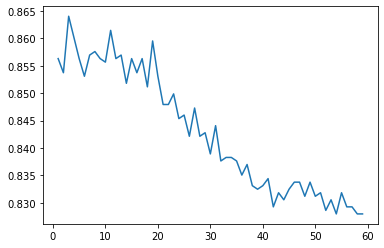

In [97]:
from sklearn.neighbors import KNeighborsClassifier

k_val = []
accuracy = []

for k in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print(k, ":", metrics.accuracy_score(y_test, y_pred))
    
    k_val.append(k)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

k = int(np.sqrt(X_train.shape[1]))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    
print(k, ":", metrics.accuracy_score(y_test, y_pred))
    
k_val.append(k)
accuracy.append(metrics.accuracy_score(y_test, y_pred))

sns.lineplot(x=k_val, y=accuracy)

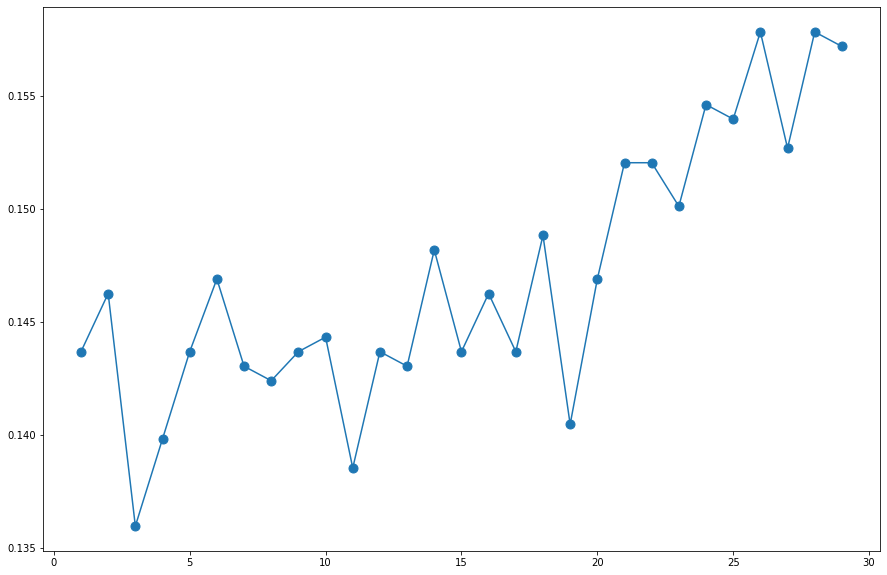

In [96]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,30),error_rate, marker='o', markersize=9)

In [60]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [66]:
from sklearn import metrics

dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get

In [103]:
from sklearn.svm import SVC

model = SVC()                   # Cost C = 1
model.fit(X_train,y_train)         # Fit the model
y_pred = model.predict(X_test)     # Predict using the model

print("Prediction :", y_pred)
print("SVM Accuracy :",metrics.accuracy_score(y_test,y_pred))
print("Confusion Matrix :")
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))

Prediction : [0 0 0 ... 0 0 0]
SVM Accuracy : 0.8634020618556701
Confusion Matrix :
[[1074   32]
 [ 180  266]]
